In [6]:
# Typical libraries for data manipulation and visualisation
import pandas 
import datetime 
import numpy 
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# For reading stock data from yahoo
import pandas_datareader as web
import yfinance as yf

# For time stamps
from datetime import datetime

# Individual stock prices 


In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','FB','AMZN']

# Set up End and Start times for data grab
end = datetime.now() #or end = datetime(2021,2,20)
start = datetime(2017,1,3)

In [9]:
prices = web.DataReader(tech_list, 'yahoo', start, end)['Adj Close']
prices.head()

Symbols,AAPL,GOOG,FB,AMZN
Date,,,,
2017-01-03,27.459938,786.140015,116.860001,753.669983
2017-01-04,27.429203,786.900024,118.690002,757.179993
2017-01-05,27.568691,794.020020,120.669998,780.450012
2017-01-06,27.876030,806.150024,123.410004,795.989990
2017-01-09,28.131361,806.650024,124.900002,796.919983


In [51]:
#viz
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left", 
                   subplot_titles=("APPLE", "GOOGLE", "Facebook", "Amazon"))

fig.add_trace(go.Scatter(x=prices.index, y=prices['AAPL'], name = 'Apple'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=prices.index, y=prices['GOOG'], name = 'Google'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=prices.index, y=prices['FB'], name = 'Facebook'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=prices.index, y=prices['AMZN'], name = 'Amazon'),
              row=2, col=2)

fig.update_layout(
    width = 900,
    height = 700,
    title = "Daily closing Prices of FAAG stock group")

fig.show()

# What was the daily return of the stock on average?


Now that we've done some baseline visualisation, let's go ahead and dive a little deeper. We're now going to analyze the return of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. 

In [11]:
# We'll use pct_change to find the percent change for each day
returns =prices.pct_change()
returns.head()

Symbols,AAPL,GOOG,FB,AMZN
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.000967,0.015660,0.004657
2017-01-05,0.005085,0.009048,0.016682,0.030732
2017-01-06,0.011148,0.015277,0.022707,0.019912
2017-01-09,0.009160,0.000620,0.012074,0.001168


In [12]:
#We can notice that there was a huge fluctuation in daily returns at the beginning of 2020, due to Covid-19
fig = make_subplots(rows=2, cols=2, start_cell="bottom-left", 
                   subplot_titles=("APPLE", "GOOGLE", "Facebook", "Amazon"))

fig.add_trace(go.Scatter(x=returns.index, y=returns['AAPL'], name = 'Apple'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=returns.index, y=returns['GOOG'], name = 'Google'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=returns.index, y=returns['FB'], name = 'Facebook'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=returns.index, y=returns['AMZN'], name = 'Amazon'),
              row=2, col=2)

fig.show()

# All stock indexes around the world


In [14]:
# Retrieving List of World Major Stock Indices from Yahoo! Finance
df_list = pandas.read_html('https://finance.yahoo.com/world-indices/')
majorStockIdx = df_list[0]
majorStockIdx.head()

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,3811.15,-18.19,-0.48%,3.12B,NaN,NaN,NaN
1,^DJI,Dow 30,30932.37,-469.64,-1.50%,538.907M,NaN,NaN,NaN
2,^IXIC,Nasdaq,13192.35,72.92,+0.56%,784.185M,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),15010.47,-196.20,-1.29%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,2601.66,-47.58,-1.80%,0,NaN,NaN,NaN


In [15]:
#Now it’s time to collect historical data of ALL stock indices.
stock_list = []
for s in majorStockIdx.Symbol: # iterate for every stock indices
    # Retrieve data from Yahoo! Finance
    tickerData = yf.Ticker(s)
    tickerDf1 = tickerData.history(period='1d', start='2010-01-01', end='2020-10-30')
    # Save historical data 
    tickerDf1['ticker'] = s # don't forget to specify the index
    stock_list.append(tickerDf1)
    # Concatenate all data
    msi = pandas.concat(stock_list, axis = 0)
    
msi = msi.reset_index()

- ^CASE30: No data found for this date range, symbol may be delisted


In [44]:
region_idx= { 'US & Canada' : ['^GSPC', '^DJI', '^IXIC', '^RUT','^GSPTSE'],
               'Latin America' : ['^BVSP', '^MXX', '^IPSA', ],
               'East Asia' : ['^N225', '^HSI', '000001.SS', '399001.SZ', '^TWII', '^KS11'],
               'ASEAN & Oceania' : ['^STI', '^JKSE', '^KLSE','^AXJO'],
               'South & West Asia' : ['^BSESN', '^TA125.TA'],
               'Europe' : ['^FTSE', '^GDAXI', '^FCHI', '^STOXX50E','^N100', '^BFX']
              }

ticker = { '^GSPC' : 'S&P 500',
           '^DJI' : 'Dow 30',
           '^IXIC' : 'NASDAQ', 
           '^RUT' : 'Russell 2000',
           '^GSPTSE' : 'S&P/TSX',
           '^BVSP' : 'IBOVESPA',
           '^MXX' : 'IPC MEXICO',
           '^IPSA' : 'S&P/CLX IPSA',
           '^N225' : 'Nikkei 225',
           '^HSI': 'Hang Seng Index',
           '000001.SS' : 'SSE Composite Index',
           '399001.SZ' : 'Shenzen Component',
           '^TWII' : 'TSEC Weighted Index',
           '^KS11' : 'KOSPI Composite Index',
           '^STI' : 'STI Index', 
           '^JKSE' : 'Jakarta Composite Index', 
           '^KLSE' : 'FTSE Bursa Malaysia KLCI',
           '^AXJO' : 'S&P/ASX 200',
           '^NZ50' : 'S&P/NZX 50 INDEX GROSS',
           '^BSESN' : 'S&P BSE SENSEX',
           '^TA125.TA' : 'TA-125',
           '^FTSE' : 'FTSE 100',
           '^GDAXI' : "DAX PERFORMANCE-INDEX",
           '^FCHI' : 'CAC 40',
           '^STOXX50E' : "ESTX 50 PR.EUR",
           '^N100': "EURONEXT 100",
           '^BFX' : "BEL 20",
           '^NYA' : "NYSE COMPOSITE (DJ)",
           '^XAX' : "NYSE AMEX COMPOSITE INDEX",
           '^BUK100P' : "Cboe UK 100 Price Return",
           "^VIX" : "CBOE Volatility Index",
           'IMOEX.ME' : 'MOEX Russia Index',
           "^AORD"  : "ALL ORDINARIES",
           "^MERV" : "MERVAL",
           "^JN0U.JO" : "Top 40 USD Net TRI Index"        
}

In [45]:
def getRegion(ticker):
    for k in region_idx.keys():
        if ticker in region_idx[k]:
            return k
msi['region']= msi.ticker.apply(lambda x: getRegion(x))

no = ['^NYA','^XAX','^BUK100P',"^VIX",'IMOEX.ME',"^AORD","^MERV","^JN0U.JO", "^NZ50"]
msi = msi.loc[msi.ticker.isin(set(msi.ticker) - set(no))]
msi

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Adj Close,region,chBegin
0,2009-12-31,1126.599976,1127.640015,1114.810059,1115.099976,2.076990e+09,0.0,0.0,^GSPC,NaN,US & Canada,[-1.5790090647435195]
1,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3.991400e+09,0.0,0.0,^GSPC,NaN,US & Canada,[0.0]
2,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,0.0,0.0,^GSPC,NaN,US & Canada,[0.31156756258232665]
3,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,0.0,0.0,^GSPC,NaN,US & Canada,[0.366289592126412]
4,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,0.0,0.0,^GSPC,NaN,US & Canada,[0.7678753781465764]
...,...,...,...,...,...,...,...,...,...,...,...,...
89787,2020-10-22,1388.469971,1398.579956,1385.510010,1395.489990,5.602860e+07,0.0,0.0,^TA125.TA,NaN,South & West Asia,[28.10417629206512]
89788,2020-10-26,1403.520020,1404.489990,1395.699951,1397.609985,5.898740e+07,0.0,0.0,^TA125.TA,NaN,South & West Asia,[28.298789101996412]
89789,2020-10-27,1400.280029,1401.849976,1385.479980,1388.900024,5.415780e+07,0.0,0.0,^TA125.TA,NaN,South & West Asia,[27.49922595267773]
89790,2020-10-28,1379.319946,1379.319946,1350.160034,1355.219971,6.994250e+07,0.0,0.0,^TA125.TA,NaN,South & West Asia,[24.407440581012295]


In [33]:
lastDate = msi.loc[msi.Date == '2020-09-30'].reset_index().drop(['index'],axis=1)
lastDate.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Adj Close,region,chBegin
0,2020-09-30,3341.209961,3393.560059,3340.469971,3363.000000,4.722530e+09,0.0,0.0,^GSPC,NaN,US & Canada,[196.8252172558308]
1,2020-09-30,27514.640625,28026.330078,27511.060547,27781.699219,4.525500e+06,0.0,0.0,^DJI,NaN,US & Canada,[162.48870291728852]
2,2020-09-30,11092.900391,11277.959961,11092.900391,11167.509766,4.228200e+09,0.0,0.0,^IXIC,NaN,US & Canada,[383.7728898368828]
3,2020-09-30,1504.839966,1528.010010,1498.290039,1507.689941,4.722530e+09,0.0,0.0,^RUT,NaN,US & Canada,[135.53975924247368]
4,2020-09-30,5897.500000,5931.399902,5854.500000,5866.100098,8.319825e+08,0.0,0.0,^FTSE,NaN,Europe,[6.6505518964076416]


In [34]:
cols = ['Date', 'ticker', 'region', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Adj Close']
lastDate = lastDate[cols]
def nearest(dates, dateRef):
    
    dts = pandas.to_datetime(dates)
    drf = pandas.to_datetime(dateRef)
    
    prevDate = dts[dts < drf]
    return prevDate[-1]

def getReturn(period, number, ticker, dt, val):

    df = msi.loc[msi.ticker == ticker].reset_index()
    existingDates = df['Date'].unique()
    
    if period == 'Y':
        dtp = (pandas.Timestamp(dt) - pandas.DateOffset(years=number))
    elif period == 'M':
        dtp = (pandas.Timestamp(dt) - pandas.DateOffset(months=number))
    elif period == 'W':
        dtp = (pandas.Timestamp(dt) - pandas.DateOffset(weeks=number))
    elif period == 'D':
        dtp = (pandas.Timestamp(dt) - pandas.DateOffset(days=number))

    df['Date_pd'] = pandas.to_datetime(df['Date'])
    if dtp in existingDates:         
        return (val/df.loc[df.Date_pd == dtp, "Close"].values[0] - 1)*100
    else:
        closestDate = nearest(existingDates, dtp)       
        return(val/df.loc[df.Date_pd == closestDate, "Close"].values[0] - 1)*100

In [35]:
lastDate['1DR'] = lastDate.apply(lambda r: getReturn('D', 1, r.ticker, r.Date, r.Close), axis =1)
lastDate['1WR'] = lastDate.apply(lambda r: getReturn('W', 1, r.ticker, r.Date, r.Close), axis =1)
lastDate['1MR'] = lastDate.apply(lambda r: getReturn('M', 1, r.ticker, r.Date, r.Close), axis =1)
lastDate['3MR'] = lastDate.apply(lambda r: getReturn('M', 3, r.ticker, r.Date, r.Close), axis =1)
lastDate['6MR'] = lastDate.apply(lambda r: getReturn('M', 6, r.ticker, r.Date, r.Close), axis =1)
lastDate['1YR'] = lastDate.apply(lambda r: getReturn('Y', 1, r.ticker, r.Date, r.Close), axis =1)
lastDate['3YR'] = lastDate.apply(lambda r: getReturn('Y', 3, r.ticker, r.Date, r.Close), axis =1)

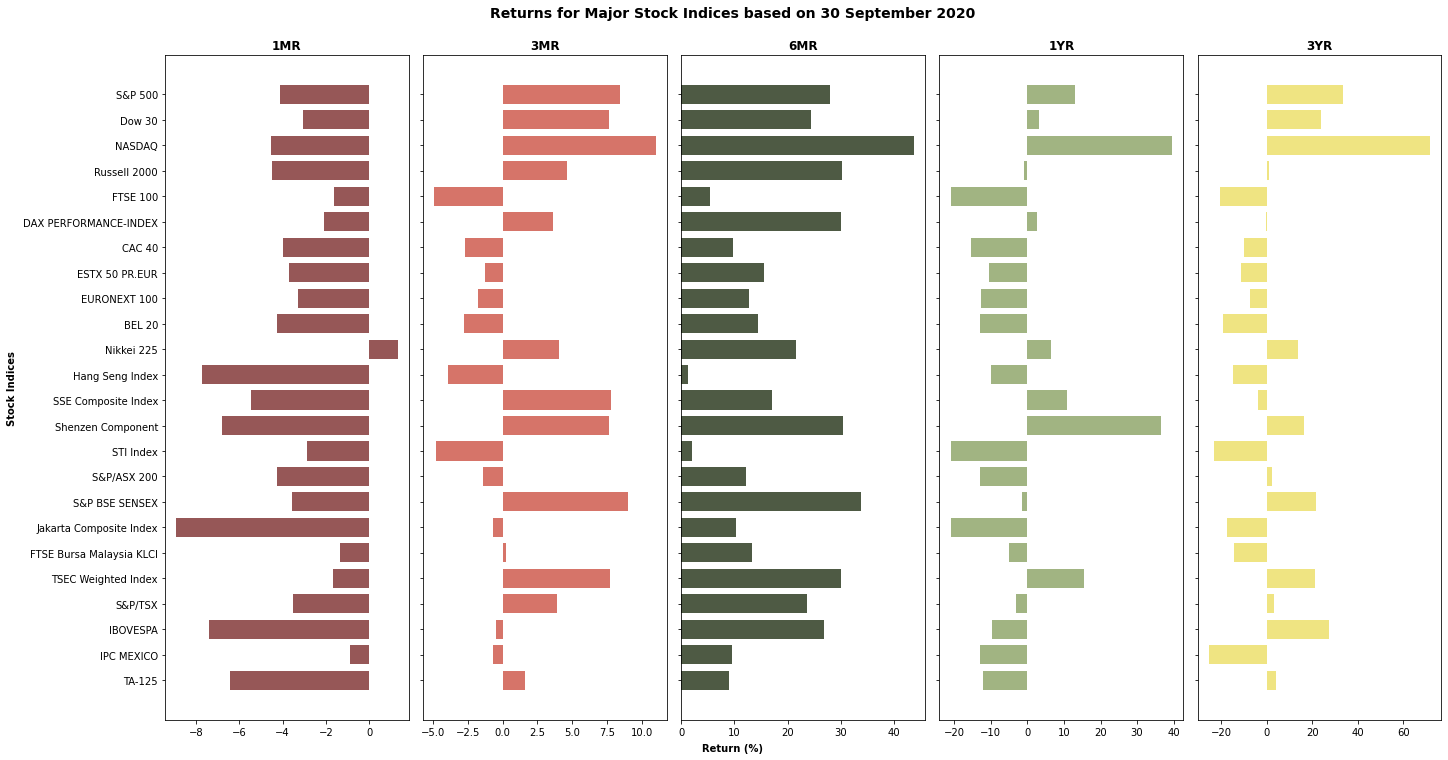

In [36]:
palette = ["#965757", "#D67469", "#4E5A44", "#A1B482", '#EFE482', "#99BFCF"]
fig, axes = plt.subplots(1,5, figsize=(20, 10),sharey=True)
width = 0.75
cols = ['1MR', '3MR', '6MR','1YR','3YR']
for i, j in enumerate(cols):
    ax = axes[i]    
    tick = lastDate.ticker.apply(lambda t : ticker[t])
    ax.barh(tick,lastDate[j], width, color = palette[i])
    ax.set_title(j, fontweight ="bold")    
    ax.invert_yaxis()

fig.text(0.5,0, "Return (%)", ha="center", va="center", fontweight ="bold")
fig.text(0,0.5, "Stock Indices", ha="center", va="center", rotation=90, fontweight ="bold")
fig.suptitle("Returns for Major Stock Indices based on 30 September 2020", fontweight ="bold",y=1.03, fontsize=14)
fig.tight_layout()

In [46]:
# Get the data for 4 Jan 2010
begRef = msi.loc[msi.Date == '2010-01-04']
def retBegin(ticker, val):
    start_val = begRef.loc[begRef.ticker == ticker, 'Close'].values
    return (val/start_val - 1) * 100
    
msi['chBegin'] = msi.apply(lambda x: retBegin(x.ticker, x.Close), axis = 1)

In [47]:
# Transform the data to be ticker column-wise
chBegin = msi.groupby(['Date', 'ticker'])['chBegin'].first().unstack()
# Fill null values with the values on the row before
chBegin = chBegin.fillna(method='bfill')
chBegin.tail()

ticker,000001.SS,399001.SZ,^AXJO,^BFX,^BSESN,^BVSP,^DJI,^FCHI,^FTSE,^GDAXI,...,^KLSE,^KS11,^MXX,^N100,^N225,^RUT,^STI,^STOXX50E,^TA125.TA,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-23,[1.0554745247429276],[-2.992064836177366],[26.468844144319693],[26.618095697961365],[131.71094329632584],[44.564208722963805],[167.72182072758056],[22.313823285995603],[6.545097772546837],[109.07941749513479],...,[17.15775149115717],[39.187215572122454],[18.160734260107713],[40.60029332323598],[120.71377997627057],[156.28808976258935],[-12.33905616503671],[5.999736750751916],[28.298789101996412],[57.15301630723501]
2020-10-26,[0.22686285966271313],[-2.5281008939912697],[26.2350623261306],[25.20271098296223],[128.63555011251302],[44.21728888571632],[161.57866206556113],[19.983959828774278],[5.30335082942035],[101.33227651946997],...,[17.15539763680678],[38.1908269285895],[16.75084381351779],[38.33196841468494],[120.50495371204173],[150.77488238741395],[-12.825481818311403],[2.897804684105343],[28.298789101996412],[57.2774095555193]
2020-10-27,[0.32542198471359196],[-1.9487899898031458],[24.089991230302978],[22.974139929828752],[130.78036099830146],[42.20286958383896],[159.47934000585903],[17.854896543267685],[4.157958719224641],[99.45390774363727],...,[17.605328284220057],[37.42026411503198],[16.004318293297537],[36.89722758051064],[120.42481076723762],[148.50961124961594],[-13.186157613517524],[1.7496205173907597],[27.49922595267773],[56.86292006814679]
2020-10-28,[0.785507571214894],[-1.0735529729028803],[24.227394498782484],[18.86995845847195],[127.36530416337138],[36.153901063601964],[150.56736152279368],[13.880276896709809],[1.4999182395419863],[91.13651999633807],...,[17.201642263129525],[38.27042517192969],[14.14954132592019],[32.921566333470054],[119.79325429941143],[141.09984192456508],[-14.201518765439868],[-1.7979988364933308],[24.407440581012295],[55.87289020781823]
2020-10-29,[0.8930984603024994],[-0.10143461025101663],[22.22997033443206],[18.433137774148435],[126.38226398682102],[37.88564494253694],[151.88218278783629],[13.844148193129936],[1.4817374123960114],[91.75753000060224],...,NaN,[37.17440198221216],[12.341340968749371],[33.1367774585962],[118.98075295323176],[143.9587588837574],[-15.334684482902738],[-1.9143090528374596],[26.004740318469356],[54.27880054687817]


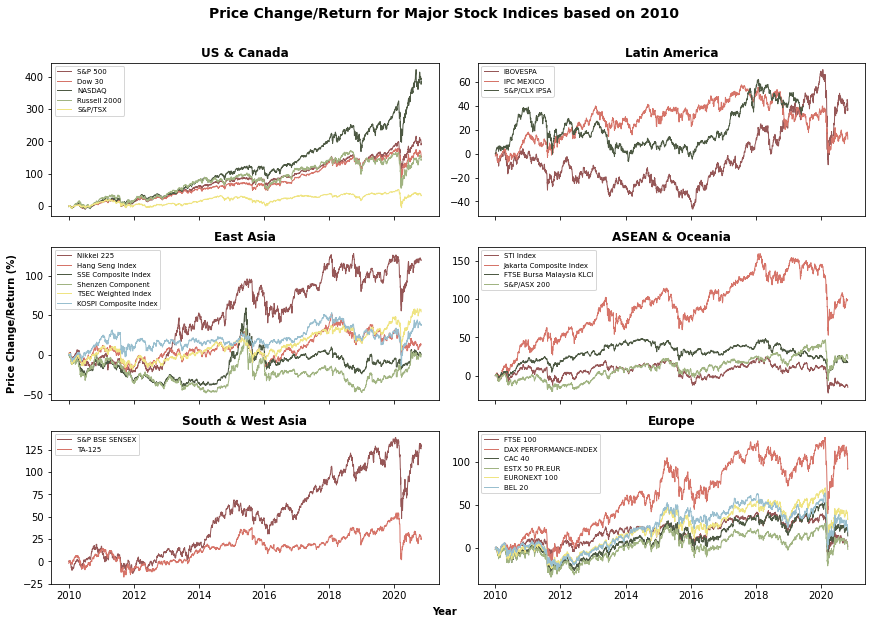

In [48]:
fig, axes = plt.subplots(3,2, figsize=(12, 8),sharex=True)

for i, k in enumerate(region_idx.keys()):
    ax = axes[int(i/2), int(i%2)]
    for j,t in enumerate(region_idx[k]):
        ax.plot(chBegin.index, chBegin[t], marker='', linewidth=1, color = palette[j])
        ax.legend([ticker[t] for t in region_idx[k]], loc='upper left', fontsize=7)
        ax.set_title(k, fontweight='bold')

fig.text(0.5,0, "Year", ha="center", va="center", fontweight ="bold")
fig.text(0,0.5, "Price Change/Return (%)", ha="center", va="center", rotation=90, fontweight ="bold")
fig.suptitle("Price Change/Return for Major Stock Indices based on 2010", fontweight ="bold",y=1.05, fontsize=14)
fig.tight_layout()